# CryptoSentiment: Predicting crypto market volatility through public sentiment

## Abstract:

Last year, bitcoin gained attention of many investors – sophisticated, unsophisticated, institutional, recreational and otherwise. Due to an increased interest in this new market, analysis of cryptocurrency has become subject of many technical writings that aim to predict token prices in highly speculative market. One of the most popular techniques to predict volatility is the use of Natural Language Processing to categorize investor sentiment evaluated via tweets and sub reddits. Most papers yielded great results when cryptocurrency prices were high, when investors inundated social media about successes. But now that the prices have plummeted and mining tokens is becoming increasingly difficult, this study suggests a phase of stability and decreased sensitivity to public emotions. The study goes over a model that collects publicly available tweets from the hashtag “cryptocurrency”, analyzes the sentiment of tweets and makes a prediction of bitcoin’s volatility. 


## Introduction:

When regarding a financial commodity, the public confidence in a commodity is a core base of its value.  Social media has served as platform to express opinions since their inception, and as such tapping into the open APIs provided of the likes of Facebook and Twitter, these arguably biased pieces of information become available with a sea of meta-data.
Bitcoin (BTC), the decentralized cryptographic currency, is similar to most commonly known currencies in the sense that it is affected by socially constructed opinions; whether those opinions have basis in facts, or not. Since the Bitcoin was revealed to the world, in 2009, it quickly gained interest as an alternative to regular currencies. As such, like most things, opinions and information about Bitcoin are prevalent throughout the Social Media sphere.
In the paper Trading on Twitter:  Using Social Media Sentiment to Predict Stock Returns by Sul et al., 2.5 million tweets about S&P 500 firms were put through the authors own sentiment classifier and compared to the stock returns.  The results showed that sentiment that disseminates through a social network quickly is anticipated to be reflected in a stock price on the same trading day, while slower spreading sentiment is more likely to be reflected on future trading days.  Basing a trading strategy on these predictions are prospected to yield 11-15% annual gains.
The paper Algorithmic Trading of Cryptocurrency Based on Twitter Sentiment Analysis by Colianni et al., similarly analyzed how tweet sentiment could be used to impact investment decisions specifically on Bitcoin. The authors used supervised machine learning techniques that yielded a final accuracy of above 90% hour-by-hour and day- by-day.   The authors point out that the 90% accuracy was mustered through robust error analysis on the input data, which on average yielded a 25% better accuracy. Colianni et al. together with Hutto and Gilbert both mentioned levels of noise in their dataset, and the former team got a significant reduction in error rates after cleaning their dataset for noise.
The sentiments as well as the currencies price are analyzed on a short-term basis, disregarding how micro-blogging sentiment correlates to macro trends in a cryptocurrency or attempting to identify if they exist.   Short term in this paper is defined to be within the 24h mark, (based on the findings of Colianni et al.).
The sentiments classification is limited to the naivest binary form of positive or negative, not attempting to capture sentiment on a more complex emotional level. On the BTC side, the key value will be limited to an increase and decrease in price over specific time intervals, disregarding volume and other key metrics. Further, BTC transactions are collected for the BTC/USD currency pair, and only collected from the Coindesk exchange due to difficulty in finding open-source aggregated exchange data.


## Workflow

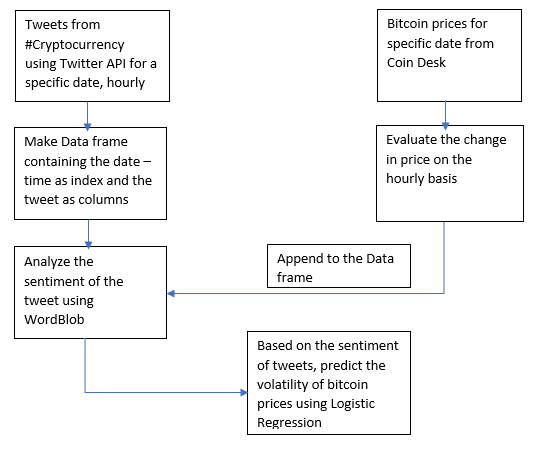

### Collection of Tweets via Tweepy

In [5]:
import tweepy
import pandas as pd
from textblob import TextBlob

consumer_key = "clPBLLDHG5mTS5ffzAzaoNRm1"
consumer_secret = "scBlLPRjI4xtUfhgBu6joELfJOeOMxTI19CdqvrlXmmBEVu209"

access_key= "962177014311432192-CoXC8gXSe3jZPqLfmOz1W0nTg5PS6TI"
access_key_secret = "8VAR6phmtnzB3NVCbU8yKWleE8s5ZivQOqEZaH9OEVako"

auth = tweepy.OAuthHandler(consumer_key,consumer_secret)
auth.set_access_token(access_key,access_key_secret)
api=tweepy.API(auth)

result = []

for tweet in tweepy.Cursor(api.search,q='%23cryptocurrency',since='2018-05-20` 11:00:00').items(200):
    result.append(tweet)
    
print(len(result))

# Converting the JSON data to a Pandas dataframe

def todf(tweets):
    dataset = pd.DataFrame() #Empty dataframe
    
    dataset['tweet id']= [tweet.id for tweet in tweets]
    dataset['tweet_text'] = [tweet.text for tweet in tweets]
    dataset['Time'] = [tweet.created_at for tweet in tweets]
    dataset['userTimezone'] = [tweet.user.time_zone for tweet 
    in tweets]
    return dataset

dataset = todf(result)
print(dataset.info())
print(dataset['Time'])

dataset.to_csv('New_file.csv')

# This program will generate tweets for the date mentioned as the "since" argument in tweepy.cursor()
# Using this program, tweets from 15th April to 12th May have been collected in the "combined.csv" file
# Everytime this netbook runs, a new file named " New_file.csv" will be created in the directory.



119
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 4 columns):
tweet id        119 non-null int64
tweet_text      119 non-null object
Time            119 non-null datetime64[ns]
userTimezone    0 non-null object
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.8+ KB
None
0     2018-05-29 09:07:18
1     2018-05-29 09:00:08
2     2018-05-29 07:23:53
3     2018-05-29 03:04:48
4     2018-05-29 01:00:04
5     2018-05-28 21:46:59
6     2018-05-28 21:28:48
7     2018-05-28 21:00:05
8     2018-05-28 18:56:38
9     2018-05-28 18:50:29
10    2018-05-28 18:50:07
11    2018-05-28 16:23:03
12    2018-05-28 15:56:45
13    2018-05-28 15:29:13
14    2018-05-28 15:03:37
15    2018-05-28 14:51:02
16    2018-05-28 14:36:33
17    2018-05-28 14:31:50
18    2018-05-28 14:22:48
19    2018-05-28 14:15:41
20    2018-05-28 13:48:02
21    2018-05-28 13:31:20
22    2018-05-28 12:00:02
23    2018-05-28 11:48:07
24    2018-05-28 11:11:02
25    2018-05-28 11

##### Using the above program, tweets from 15th April to 12th May have been collected in the "combined.csv" file


### Bitcoin Prices : Data Collection and Wrangling

Bitcoin Prices from April 11th, 2018 to May 11th, 2018 were collected on an hourly basis from https://www.coindesk.com/price/ and saved as "price" dataframe in "Bitcoin_Prices_April 11_May 11.csv" file. The prices are then classified into two classes as following:

P(t) - P(t+1) > 0   : Price Difference Class = 1
P(t) - P(t+1) <= 0  : Price Difference Class = 0

Based on the classification, a new column label " Price Difference Class" is added to "price" dataframe.


In [6]:
import pandas as pd
from datetime import datetime

price = pd.read_csv('Bitcoin_Prices_April 11_May 11.csv',parse_dates=True)

price.drop([744,745],inplace=True)

delta_price = []

for i in range(1,len(price.index)):
    
     delta_price.append(price['Close Price'].loc[i] - price['Close Price'].loc[i-1])


delta_price.append(0)

delta_price_bin = []


for j in delta_price:
    
    if j <=0:
        delta_price_bin.append(0)
    else:
        delta_price_bin.append(1)


price['Price Difference Class'] = delta_price_bin

print(price.tail())

price['Date'] = price['Date'].astype('datetime64[s]')

price.index = pd.to_datetime(price['Date'])

price.index = price.index.round('1H')

price.to_csv('Bitcoin Prices.csv')


                    Date  Close Price  Price Difference Class
739  2018-05-11 19:00:00      8601.10                       0
740  2018-05-11 20:00:00      8436.20                       0
741  2018-05-11 21:00:00      8392.86                       1
742  2018-05-11 22:00:00      8426.23                       0
743  2018-05-11 23:00:00      8392.00                       0


### Visualizing Sentiments of Tweets and Bitcoin Prices

price dataframe converted to DateTime Index with time rounded of to closest 1 hour
tweet dataframe converted to DateTime Index with time rounded pf to closest 1 hour. A new column label "Sentiment" ,reflecting the polarity of the tweet, is added to the dataframe. 

df = tweet merged with price dataframe. DateTime index with common time indices of price and tweet dataframes  


 Neutral Sentiment :302

 Positive Sentiment :164

 Negative Sentiment :23
                         tweet id  \
2018-05-03 01:00:00  9.920000e+17   
2018-05-03 01:00:00  9.920000e+17   
2018-05-03 03:00:00  9.920000e+17   
2018-05-03 04:00:00  9.920000e+17   
2018-05-03 05:00:00  9.920000e+17   

                                                            tweet_text  \
2018-05-03 01:00:00  BOUGHT [ #XRPBTC | #binance | Price: 0.0000927...   
2018-05-03 01:00:00  RT @litenettcom: With an audience of 10 millio...   
2018-05-03 03:00:00  #Cryptos: \r\n\r\n#BTC 9270.10$ | 7754.53€\r\n...   
2018-05-03 04:00:00  RT @tihosay: Tihosay Pre-ICO will begin April ...   
2018-05-03 05:00:00  #Cryptos: \r\n\r\n#BTC 9252.40$ | 7739.73€\r\n...   

                     Sentiment  Close Price  Price Difference Class  
2018-05-03 01:00:00        0.0      9221.87                       1  
2018-05-03 01:00:00        0.0      9221.87                       1  
2018-05-03 03:00:00        0.0      9222.94   

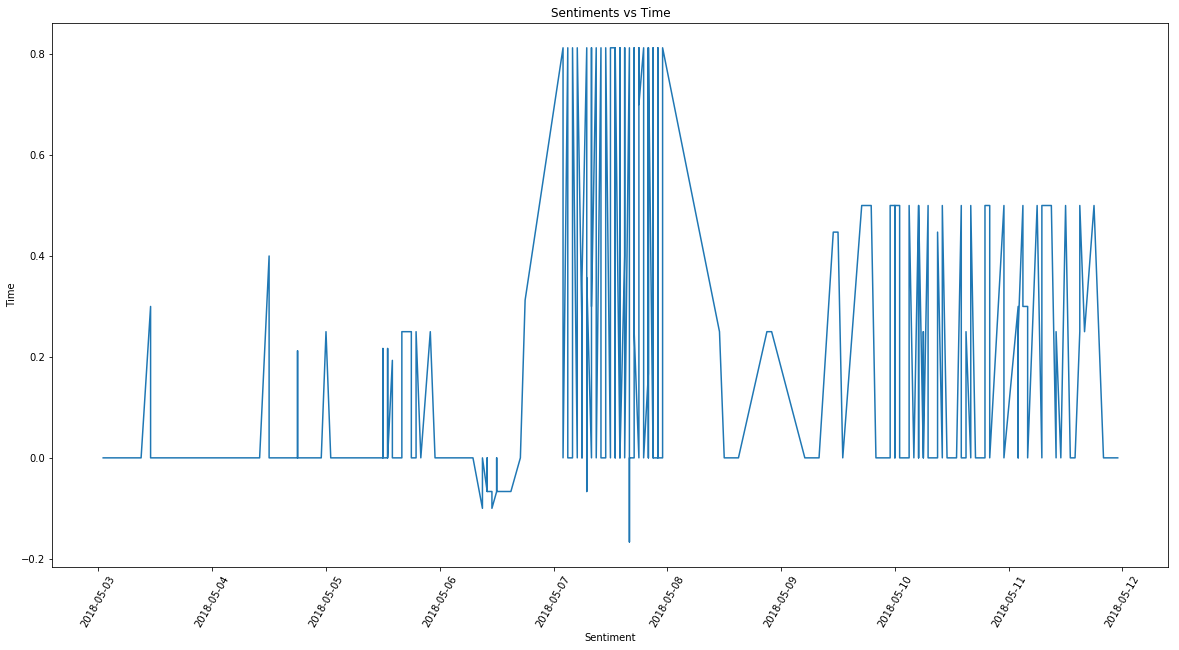

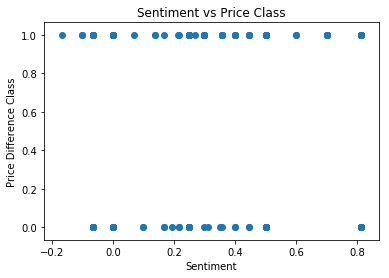

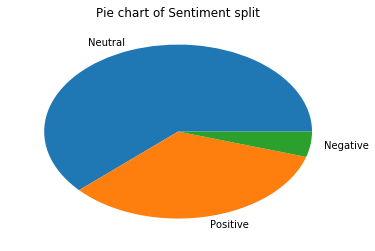

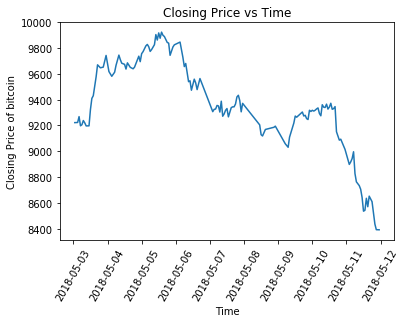

In [7]:
import pandas as pd
from textblob import TextBlob
from datetime import datetime,timedelta
import matplotlib.pyplot as plt


tweet = pd.read_csv('combined.csv',parse_dates=True)
price = pd.read_csv('Bitcoin Prices.csv')


tweet['Time'] = tweet['Time'].astype('datetime64[s]')

tweet.index = pd.to_datetime(tweet['Time']- timedelta(hours=1))
tweet.index = tweet.index.round('1H')

price['Date'] = price['Date'].astype('datetime64[s]')

price.index = pd.to_datetime(price['Date'])

price.index = price.index.round('1H')

senti = []

for i in tweet['tweet_text']:
    
    
    senti.append(TextBlob(i).polarity)
    

tweet['Sentiment'] = senti


count_0 = 0
count_pos = 0
count_neg =0

for j in senti:
    
    if j==0:
        count_0+=1
        
    elif j>0:
        
    
        count_pos+=1
    else :
        
        count_neg+=1


print('\n Neutral Sentiment :' + str(count_0))

print('\n Positive Sentiment :' + str(count_pos))

print('\n Negative Sentiment :' + str(count_neg))

senti_list = [count_0,count_pos,count_neg]

df = tweet.merge(price,left_index=True,right_index=True,how='inner')

df.drop(['Date','Date.1','Time'],axis=1,inplace=True)

print(df.head())

print(df.info())

plt.figure(figsize=(20,10))
plt.plot(df['Sentiment'])
plt.xlabel('Sentiment')
plt.ylabel('Time')
plt.title('Sentiments vs Time')
plt.xticks(rotation=60)
plt.show()

plt.scatter(df['Sentiment'],df['Price Difference Class'])
plt.xlabel('Sentiment')
plt.ylabel('Price Difference Class')
plt.title('Sentiment vs Price Class')
plt.show()


plt.pie(senti_list,labels=['Neutral','Positive','Negative'])
plt.title('Pie chart of Sentiment split')
plt.show()

plt.plot(df['Close Price'])
plt.xlabel('Time')
plt.ylabel('Closing Price of bitcoin')
plt.title('Closing Price vs Time')
plt.xticks(rotation=60)
plt.show()


####  Comments on sentiments, prices, "# cryptocurrency" trend on twitter

1. As expected, a majority of sentiments are neutral or 0 in polarity. Upon further investigation it was noted that most tweets in May 2018 are images of charts indicating or naively predicting the prices of bitcoin. This type of dataset is beyond the scope of this project. 

2. Second most observed sentiment in the dataset was positive in nature at 33.5 % of tweets showing polarity greater than 0

3. Lastly, only 4% of tweets indicated negative sentiment with polarity less than 0. These features are best represented by the pie plot. 

4. The sentiment vs price class does not indicate an obvious correlation. For price class 1, the evaluated sentiments span all possible ranges i.e. negative to positive. For price class 0, the evaluated sentiments are relatively less spaced out but, nonetheless, fall in all possible ranges of sentiments.   



### Logistic Regression 

#### Hyperparameter tuning via GridSearchCV with handling of class imbalance

C:\Users\anujs\Anaconda3\lib\site-packages\ipykernel_launcher.py:42: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\anujs\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\anujs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anujs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\anujs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning:

Best hyperparameters for logistic regression {'C': 0.001, 'penalty': 'l2'}:

 Score of Logistic Regression 0.49696969696969695:


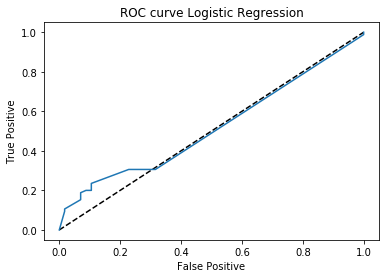

Area under the ROC curve 0.517234262125903

 Classification Report : 
             precision    recall  f1-score   support

          0       0.40      0.68      0.50        57
          1       0.59      0.31      0.40        85

avg / total       0.51      0.46      0.44       142


 Confusion Matrix :


array([[39, 18],
       [59, 26]], dtype=int64)

In [12]:
import pandas as pd
from textblob import TextBlob
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,roc_curve,roc_auc_score,confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

tweet = pd.read_csv('combined.csv',parse_dates=True)
price = pd.read_csv('Bitcoin Prices.csv')


tweet['Time'] = tweet['Time'].astype('datetime64[s]')
tweet.index = pd.to_datetime(tweet['Time']- timedelta(hours=1))
tweet.index = tweet.index.round('1H')

price['Date'] = price['Date'].astype('datetime64[s]')
price.index = pd.to_datetime(price['Date'])
price.index = price.index.round('1H')


senti = []

for i in tweet['tweet_text']:
    
    
    senti.append(TextBlob(i).polarity)
    

tweet['Sentiment'] = senti


df = tweet.merge(price,left_index=True,right_index=True,how='inner')


df.drop(['Date','Date.1','Time'],axis=1,inplace=True)


X = df['Sentiment'].reshape(-1,1)
y = df['Price Difference Class'].reshape(-1,1)


X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.3)

logreg = LogisticRegression(class_weight='balanced')

param_grid = {'penalty':['l1','l2'],'C':[0.001,0.01,0.1,1,10,100,1000]}

logreg_cv = GridSearchCV(logreg,param_grid,cv=5)

logreg_cv.fit(X_train,y_train)

print("Best hyperparameters for logistic regression {}:" .format(logreg_cv.best_params_))


print("\n Score of Logistic Regression {}:" .format(logreg_cv.best_score_))

y_pred = logreg_cv.predict(X_test)

y_pred_proba = logreg_cv.predict_proba(X_test)[:,1]

fpr,tpr,threshold = roc_curve(y_test,y_pred_proba)

plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive')
plt.ylabel('True Positive')
plt.title('ROC curve Logistic Regression')
plt.show()

print("Area under the ROC curve {}".format(roc_auc_score(y_test,y_pred_proba)))

print("\n Classification Report : ")

print(classification_report(y_test,y_pred))

print("\n Confusion Matrix :")
    
confusion_matrix(y_test,y_pred)


#### Using the model with tuned hyperparameters on new dataframe "new_tweet" containing tweets from May 20th to May 25th. Output of the model gets stored in a dataframe named "results" that contains Time and Predicted Class. 

In [13]:

import pandas as pd
from textblob import TextBlob
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report


new_tweet = pd.read_csv('Tweets_May20_timecontrolled.csv')

new_senti = []

for j in new_tweet['tweet_text']:
    
    
    new_senti.append(TextBlob(j).polarity)
    

new_tweet['Sentiment'] = new_senti

    
X = df['Sentiment'].reshape(-1,1)
y = df['Price Difference Class'].reshape(-1,1)

X_new = new_tweet['Sentiment'].reshape(-1,1)

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state =42,test_size=0.3)

logreg_new = LogisticRegression(C=0.001,penalty='l2',class_weight='balanced')

logreg_new.fit(X,y)

y_pred_new =logreg_new.predict(X_new)



result = pd.DataFrame({'Time':new_tweet['Time'],'Predicted Class':y_pred_new})
    
print(result.tail())

result.to_csv('Result.csv')



    Predicted Class                 Time
80                0  2018-05-20 10:10:01
81                0  2018-05-20 10:04:19
82                0  2018-05-20 09:05:01
83                0  2018-05-20 09:00:08
84                1  2018-05-20 03:00:06


C:\Users\anujs\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\anujs\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\anujs\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Users\anujs\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Results and Discussions

#### Comparing the prediction to the actual changes in the bitcoin prices

In [16]:
import pandas as pd
from textblob import TextBlob
from datetime import datetime,timedelta
import matplotlib.pyplot as plt

result = pd.read_csv('Result.csv')
price_in_dates = pd.read_csv('coindesk-2018-05-19_2018-05-22.csv')

price_in_dates.drop([5760,5761],inplace=True)

delta_price = []


for i in range(1,len(price_in_dates.index)):
    
     delta_price.append(price_in_dates['Close Price'].loc[i] - price_in_dates['Close Price'].loc[i-1])


delta_price.append(0)

delta_price_bin = []

for j in delta_price:
    
    if j <=0:
        delta_price_bin.append(0)
    else:
        delta_price_bin.append(1)


price_in_dates['Price Difference Class'] = delta_price_bin

df_1 = result.merge(price_in_dates,left_index=True,right_index=True,how='inner')

print(df_1.head())

correct = 0
incorrect = 0

for y in range(0,len(df_1.index)):

    if (df_1['Price Difference Class'].loc[y] ==df_1['Predicted Class'].loc[y]):
    
        correct+=1
    else:
        incorrect+=1
        
print('\n Correct Prediction :' + str(correct/(correct+incorrect)))

print('\n Incorrect Prediction :' + str(incorrect/(incorrect+correct)))




   Unnamed: 0  Predicted Class                 Time                 Date  \
0           0                0  2018-05-25 09:07:02  2018-05-19 00:00:00   
1           1                0  2018-05-25 09:05:01  2018-05-19 00:01:00   
2           2                0  2018-05-25 09:00:01  2018-05-19 00:02:00   
3           3                0  2018-05-25 03:23:14  2018-05-19 00:03:00   
4           4                1  2018-05-25 03:23:00  2018-05-19 00:04:00   

   Close Price  Price Difference Class  
0      8240.72                       1  
1      8243.77                       1  
2      8244.46                       1  
3      8245.25                       1  
4      8250.67                       1  

 Correct Prediction :0.49411764705882355

 Incorrect Prediction :0.5058823529411764


#### Discussion Section

1. As mentioned earlier in the abstract, most papers, thesis and projects have concluded some sensitivity of bitcoin prices to public sentiments. The timing of these projects is something to consider. Most publications were rolled out at the time when bitcoin prices had crossed the 15000 dollar mark and public inundated the social media with tweets about cryptocurrency market, making bitcoin very valuable and causing a ‘mob effect’. Incidentally, the second group of publication came out when mining cryptocurrency was reasonably easy and as a result bitcoin had negligible value. 

2. The results of this model suggest that public sentiment alone is not sufficient to make prediction of bitcoin volatility, for the month of May 2018. This finding is in lines with the following article https://www.forbes.com/sites/petertchir/2018/05/28/i-would-be-shocked-if-bitcoin-prices-werent-manipulated/#37c8cc632be9, which also concludes that its not the sentiment of the mass that affects the bitcoin prices, rather the sentiment of high net worth individuals and miners that directly impact the pricing and trade volumes. This falls under the case of predicting a "Black Swan" event that is difficult to do so with micro blogging data.

 

## Conclusion

1. For the month of May 2018, there seems to be no visible correlation between pricing of a bitcoin and the public sentiment

2. By continually investigating the data by running on this model for coming months, it should be possible to make a comment about stability of bitcoin token and the cryptocurrency market, at large.

3. A portion of this project has been shared with the technical team at Centareum, Singapore to evaluate use case of sentiment analysis to categorize feedback for effective marketing. Results pending.

 

## References

1. Hong Kee Sul, Alan R Dennis, and Lingyao Ivy Yuan.   Trading on twitter: Using social media sentiment to predict stock returns. Decision Sciences, 2016.

2. Stuart Colianni, Stephanie Rosales, and Michael Signorotti.   Al- gorithmic  trading  of  cryptocurrency  based  on  twitter  senti- ment  analysis.    2015.    URL  http://cs229.stanford.edu/ proj2015/029_report.pdf.

3. Collin  Thompson.    How  does  the  blockchain  work  (for  dum- mies)  explained  simply.     URL  https://medium.com/the- intrepid-review/how-does-the-blockchain-work- for-dummies-explained-simply-9f94d386e093.

4.  Inc Twitter.  Api overview — twitter developers, .  URL https:dev.twitter.com/overview/api.

5. Bitcoin   price   index   api   -   coindesk,   .      URL   http://www. coindesk.com/api/.

6. Tweepy, . URL http://www.tweepy.org/.
